In [82]:
import re
import json
import seaborn as sns
import arabic_reshaper as a_r
import matplotlib.pyplot as plt
from bidi import algorithm as bidialg

%matplotlib inline

In [70]:
with open('../../data/all_word_freqs_85.json', 'r') as f:
        all_word_freqs = json.load(f)

In [71]:
spec_word_dict = {}

In [120]:
def tf_time_of_word(spec_word_dict, word, pattern, max_thres, *wrong):
    spec_word_dict[word] = {}

    for category in range(len(all_word_freqs)):
        spec_word_dict[word][category] = {}
        for era in range(len(all_word_freqs[category])):
            for w_f in all_word_freqs[category][era]:
                if (pattern.match(w_f[0])) and (not wrong.match(w_f[0])) and (w_f[1] < max_thres):
                    print('C: {} - E: {} - W: {} - F: {}'.format(category,era,w_f[0],w_f[1]))
                    spec_word_dict[word][category][era] = w_f[1]
                    break

In [138]:
#tf_time_of_word(spec_word_dict, 'قياس', re.compile("[فال]*[م]*قي[ا]*س"), re.compile("ااااااااا"), 1.75)

In [46]:
current_palette = sns.color_palette()

category_graphs = {
    134: ['Ḥanafī', current_palette[0]],
    135: ['Mālikī', current_palette[1]],
    136: ['Shāfiʿī', current_palette[2]],
    137: ['Ḥanbalī', current_palette[3]],
}

In [135]:
def plot_freq_time(word):
    f,ax = plt.subplots(figsize=(20,10))
    for i,category in enumerate(category_graphs):
        ax.plot(list(spec_word_dict[word][i].values()),label=category_graphs[category][0],color=category_graphs[category][1],
                linewidth = 5, linestyle = '-', alpha=.7)

    ax.legend(fontsize=15)
    ax.set_xlabel("Lunar Year", fontsize=19);
    ax.set_ylabel("Word Frequency", fontsize=19);
    ax.set_xticklabels([0,200,500,700,900,1250,1500], fontsize=15);
    [tick.label.set_fontsize(15) for tick in ax.yaxis.get_major_ticks()]
    ax.set_title("Use of the word '{}'".format((bidialg.get_display(word))), fontsize=25);

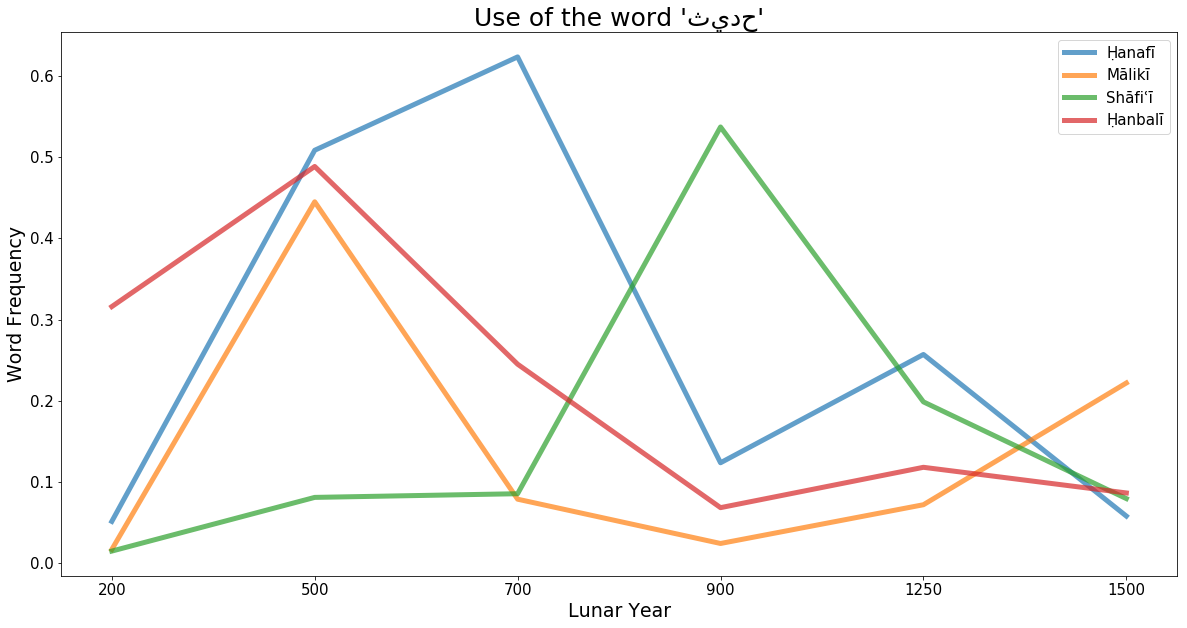

In [136]:
plot_freq_time('حديث')

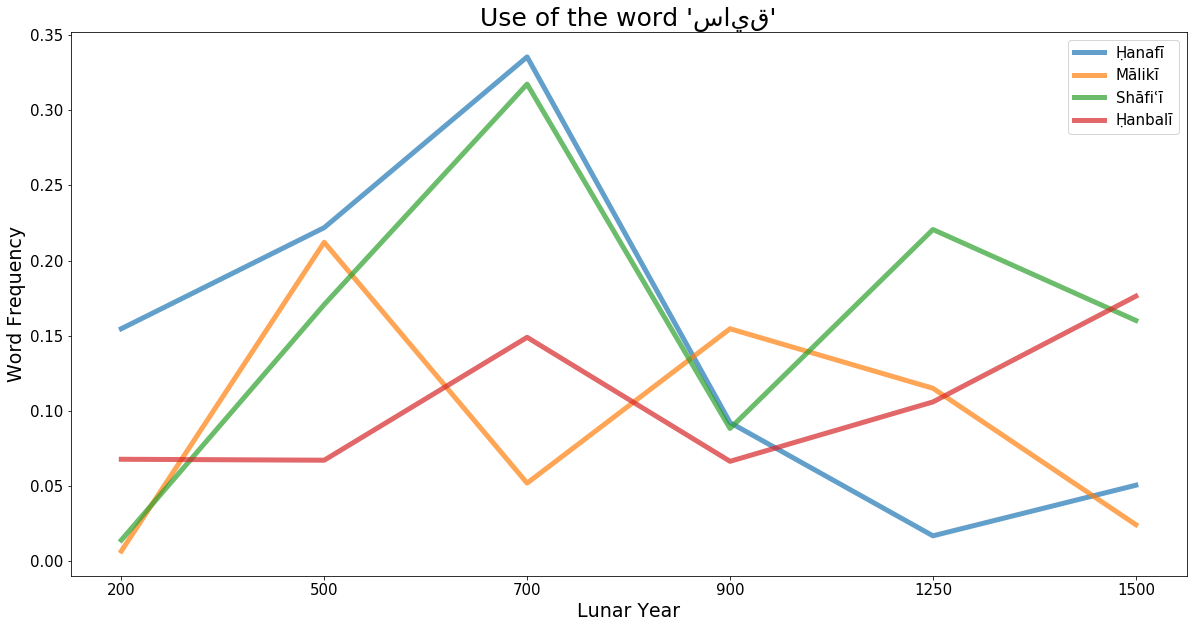

In [137]:
plot_freq_time('قياس')